### 1. Import library

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import model_from_yaml

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

### 2. EDA

In [3]:
path = "../img/train"
class_names = ['battery','camera_battery', 'cardboard','clothes','contaminated_plastic','glass', 'human', 'keyboard','metal','mouse','pak','pants','paper', 'pen','phone', 'plastic','wrapper']
class_num = len(class_names)
print(class_num)
total = 0

for name in class_names:
    name_path = os.path.join(path, name)
    num = len(os.listdir(name_path))
    total += num
    print("Number of " + name + " image:" + str(num))

print("Total number of image: " + str(total))

17
Number of battery image:178
Number of camera_battery image:179
Number of cardboard image:402
Number of clothes image:332
Number of contaminated_plastic image:399
Number of glass image:459
Number of human image:448
Number of keyboard image:364
Number of metal image:342
Number of mouse image:328
Number of pak image:246
Number of pants image:258
Number of paper image:417
Number of pen image:390
Number of phone image:508
Number of plastic image:405
Number of wrapper image:340
Total number of image: 5995


In [26]:
from PIL import Image

for name in class_names:
    name_path = os.path.join(path, name)
    file_list = os.listdir(name_path)
    for n in file_list:
        file_path = os.path.join(name_path, n)
        try:
            img = Image.open(file_path)
        except:
            os.remove(file_path)

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


### 3. Pre-processing

In [13]:
batch_size = 128
epochs = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150
split = 0.2
total_val = total * split
total_train = total - total_val
print("Total number of training set: " + str(total_train))
print("Total number of validation set: " + str(total_val))

Total number of training set: 4796.0
Total number of validation set: 1199.0


In [5]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=split,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                   )

In [6]:
train_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='training')

validation_generator = data_generator.flow_from_directory(directory=path,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True,
                                                    subset='validation')

Found 4804 images belonging to 17 classes.
Found 1191 images belonging to 17 classes.


In [7]:
labels = (train_generator.class_indices)
print(labels)

{'battery': 0, 'camera_battery': 1, 'cardboard': 2, 'clothes': 3, 'contaminated_plastic': 4, 'glass': 5, 'human': 6, 'keyboard': 7, 'metal': 8, 'mouse': 9, 'pak': 10, 'pants': 11, 'paper': 12, 'pen': 13, 'phone': 14, 'plastic': 15, 'wrapper': 16}


### 4. Visualisation

In [12]:
def plotImg(img, label):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

In [33]:
sample_img_train, sample_label_train = next(train_generator)

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


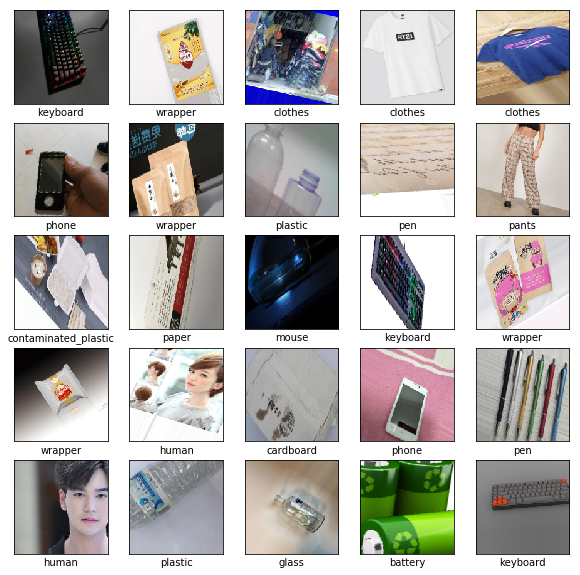

In [34]:
plotImg(sample_img_train, sample_label_train)

### 5. Model

In [8]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(class_num, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/40


C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


37/37 [==============================] - 203s 5s/step - loss: 2.7335 - acc: 0.1290 - val_loss: 2.5636 - val_acc: 0.1858
Epoch 2/40
37/37 [==============================] - 171s 5s/step - loss: 2.2661 - acc: 0.2951 - val_loss: 2.4022 - val_acc: 0.2882
Epoch 3/40
37/37 [==============================] - 167s 5s/step - loss: 1.9973 - acc: 0.3770 - val_loss: 2.2325 - val_acc: 0.3455
Epoch 4/40
37/37 [==============================] - 162s 4s/step - loss: 1.8724 - acc: 0.4057 - val_loss: 2.1760 - val_acc: 0.3559
Epoch 5/40
37/37 [==============================] - 175s 5s/step - loss: 1.7419 - acc: 0.4450 - val_loss: 2.0689 - val_acc: 0.3759
Epoch 6/40
37/37 [==============================] - 144s 4s/step - loss: 1.6965 - acc: 0.4577 - val_loss: 2.0707 - val_acc: 0.3845
Epoch 7/40
37/37 [==============================] - 155s 4s/step - loss: 1.6471 - acc: 0.4844 - val_loss: 1.9986 - val_acc: 0.4028
Epoch 8/40
37/37 [==============================] - 150s 4s/step - loss: 1.5481 - acc: 0.5045 

37/37 [==============================] - 60s 2s/step - loss: 0.9395 - acc: 0.6972 - val_loss: 1.7668 - val_acc: 0.5599
Epoch 39/40
37/37 [==============================] - 57s 2s/step - loss: 0.8954 - acc: 0.6963 - val_loss: 1.8055 - val_acc: 0.5304
Epoch 40/40
37/37 [==============================] - 68s 2s/step - loss: 0.9204 - acc: 0.6967 - val_loss: 1.8001 - val_acc: 0.5174


In [20]:
def plt_acc_loss():
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='lower left')
    plt.title('Training and Validation Loss')

    plt.show()

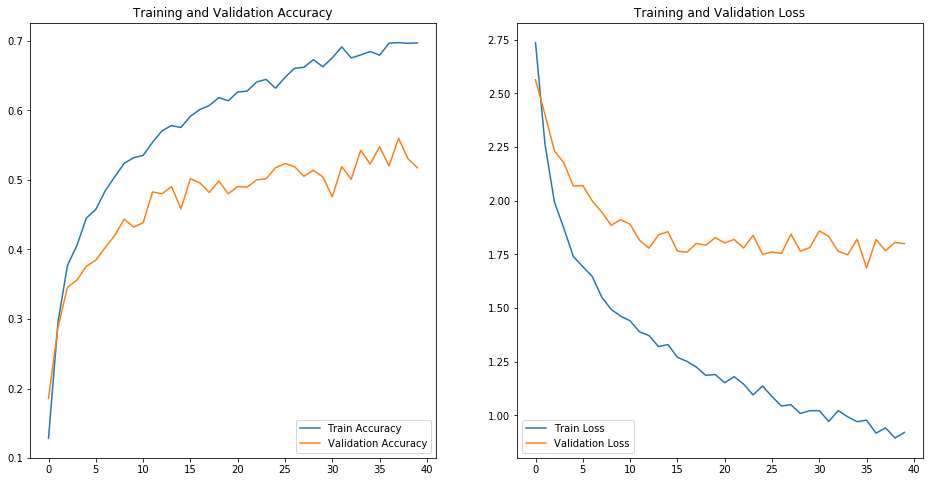

In [12]:
plt_acc_loss()

### 6. Dropout

In [15]:
model_1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(class_num, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model_1.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/100
 3/37 [=>............................] - ETA: 57s - loss: 2.3801 - acc: 0.2396

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


37/37 [==============================] - 70s 2s/step - loss: 2.2455 - acc: 0.2906 - val_loss: 2.2523 - val_acc: 0.2708
Epoch 2/100
37/37 [==============================] - 68s 2s/step - loss: 2.0581 - acc: 0.3443 - val_loss: 2.2113 - val_acc: 0.3194
Epoch 3/100
37/37 [==============================] - 68s 2s/step - loss: 1.9366 - acc: 0.3925 - val_loss: 2.1501 - val_acc: 0.3411
Epoch 4/100
37/37 [==============================] - 69s 2s/step - loss: 1.8450 - acc: 0.4198 - val_loss: 2.0923 - val_acc: 0.3438
Epoch 5/100
37/37 [==============================] - 67s 2s/step - loss: 1.7471 - acc: 0.4435 - val_loss: 1.9849 - val_acc: 0.3776
Epoch 6/100
37/37 [==============================] - 66s 2s/step - loss: 1.7315 - acc: 0.4491 - val_loss: 1.9445 - val_acc: 0.4106
Epoch 7/100
37/37 [==============================] - 66s 2s/step - loss: 1.6726 - acc: 0.4636 - val_loss: 1.9330 - val_acc: 0.4132
Epoch 8/100
37/37 [==============================] - 66s 2s/step - loss: 1.6113 - acc: 0.4852 -

37/37 [==============================] - 60s 2s/step - loss: 0.8762 - acc: 0.7139 - val_loss: 1.7426 - val_acc: 0.5816
Epoch 76/100
37/37 [==============================] - 62s 2s/step - loss: 0.8757 - acc: 0.7143 - val_loss: 1.7384 - val_acc: 0.5790
Epoch 77/100
37/37 [==============================] - 57s 2s/step - loss: 0.8764 - acc: 0.7145 - val_loss: 1.9228 - val_acc: 0.5694
Epoch 78/100
37/37 [==============================] - 70s 2s/step - loss: 0.8632 - acc: 0.7209 - val_loss: 1.8016 - val_acc: 0.5686
Epoch 79/100
37/37 [==============================] - 74s 2s/step - loss: 0.8805 - acc: 0.7111 - val_loss: 1.7378 - val_acc: 0.5816
Epoch 80/100
37/37 [==============================] - 69s 2s/step - loss: 0.8686 - acc: 0.7128 - val_loss: 1.9118 - val_acc: 0.5582
Epoch 81/100
37/37 [==============================] - 68s 2s/step - loss: 0.8610 - acc: 0.7205 - val_loss: 1.7933 - val_acc: 0.5859
Epoch 82/100
37/37 [==============================] - 68s 2s/step - loss: 0.8468 - acc: 0

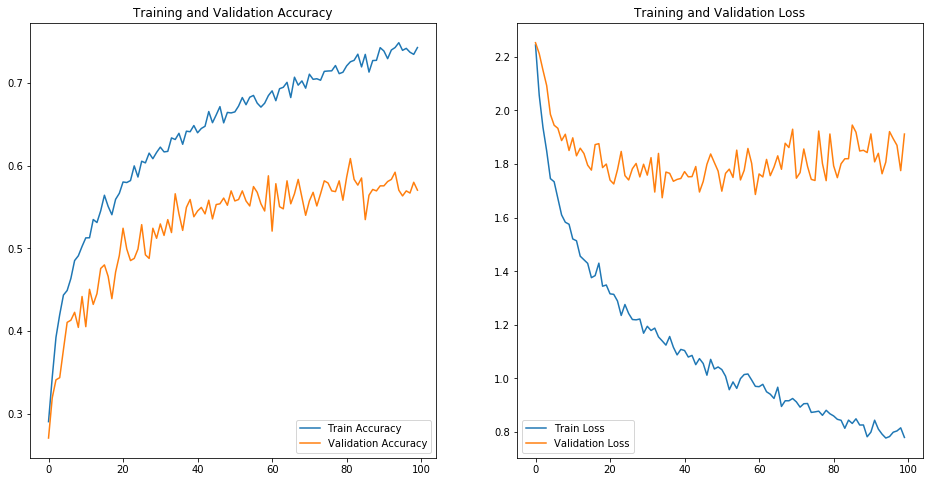

In [21]:
plt_acc_loss()
# best 35

### 7. Leaky ReLu

In [22]:
model_2 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256),
    LeakyReLU(alpha=0.1),
    Dense(class_num, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model_2.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/100


C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


37/37 [==============================] - 72s 2s/step - loss: 2.7999 - acc: 0.1349 - val_loss: 2.5626 - val_acc: 0.1875
Epoch 2/100
37/37 [==============================] - 71s 2s/step - loss: 2.2782 - acc: 0.2898 - val_loss: 2.2888 - val_acc: 0.2951
Epoch 3/100
37/37 [==============================] - 69s 2s/step - loss: 2.0368 - acc: 0.3691 - val_loss: 2.3124 - val_acc: 0.3238
Epoch 4/100
37/37 [==============================] - 68s 2s/step - loss: 1.8791 - acc: 0.4110 - val_loss: 2.2156 - val_acc: 0.3498
Epoch 5/100
37/37 [==============================] - 69s 2s/step - loss: 1.8056 - acc: 0.4388 - val_loss: 2.1165 - val_acc: 0.3759
Epoch 6/100
37/37 [==============================] - 67s 2s/step - loss: 1.6892 - acc: 0.4760 - val_loss: 2.0888 - val_acc: 0.3880
Epoch 7/100
37/37 [==============================] - 67s 2s/step - loss: 1.6030 - acc: 0.4870 - val_loss: 2.0918 - val_acc: 0.3880
Epoch 8/100
37/37 [==============================] - 66s 2s/step - loss: 1.5280 - acc: 0.5148 -

37/37 [==============================] - 61s 2s/step - loss: 0.5550 - acc: 0.8191 - val_loss: 2.1873 - val_acc: 0.5608
Epoch 76/100
37/37 [==============================] - 60s 2s/step - loss: 0.5726 - acc: 0.8131 - val_loss: 2.0543 - val_acc: 0.5668
Epoch 77/100
37/37 [==============================] - 57s 2s/step - loss: 0.5630 - acc: 0.8131 - val_loss: 2.2157 - val_acc: 0.5651
Epoch 78/100
37/37 [==============================] - 69s 2s/step - loss: 0.5312 - acc: 0.8193 - val_loss: 2.2081 - val_acc: 0.5712
Epoch 79/100
37/37 [==============================] - 68s 2s/step - loss: 0.5530 - acc: 0.8195 - val_loss: 2.0695 - val_acc: 0.5660
Epoch 80/100
37/37 [==============================] - 67s 2s/step - loss: 0.5694 - acc: 0.8116 - val_loss: 2.2334 - val_acc: 0.5295
Epoch 81/100
37/37 [==============================] - 67s 2s/step - loss: 0.5543 - acc: 0.8154 - val_loss: 2.1520 - val_acc: 0.5738
Epoch 82/100
37/37 [==============================] - 66s 2s/step - loss: 0.5369 - acc: 0

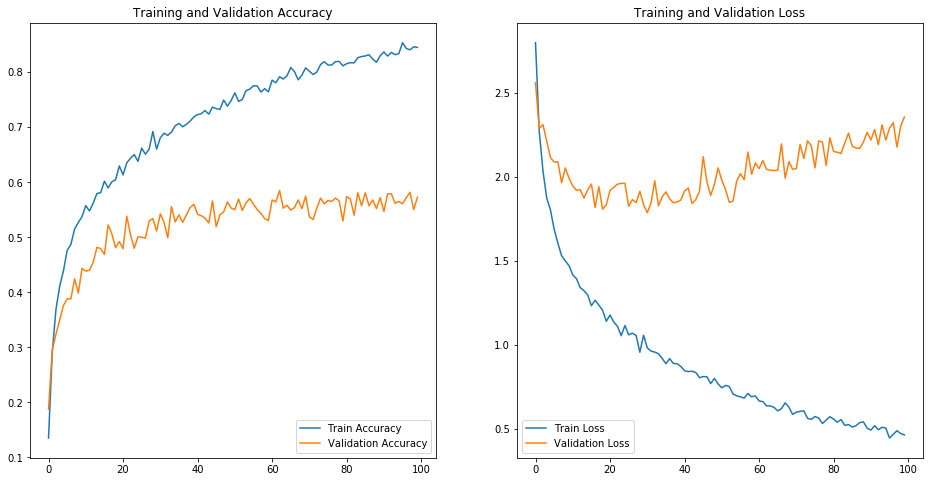

In [25]:
plt_acc_loss()
# best 34

### 8. Dropout 0.5

In [26]:
model_1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(class_num, activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model_1.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/100
 1/37 [..............................] - ETA: 59s - loss: 2.9349 - acc: 0.0469

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


37/37 [==============================] - 69s 2s/step - loss: 2.8032 - acc: 0.1061 - val_loss: 2.6274 - val_acc: 0.1979
Epoch 2/100
37/37 [==============================] - 68s 2s/step - loss: 2.5989 - acc: 0.1762 - val_loss: 2.5135 - val_acc: 0.2179
Epoch 3/100
37/37 [==============================] - 75s 2s/step - loss: 2.4275 - acc: 0.2438 - val_loss: 2.3579 - val_acc: 0.2778
Epoch 4/100
37/37 [==============================] - 72s 2s/step - loss: 2.2927 - acc: 0.2782 - val_loss: 2.2504 - val_acc: 0.3142
Epoch 5/100
37/37 [==============================] - 69s 2s/step - loss: 2.1850 - acc: 0.3204 - val_loss: 2.2065 - val_acc: 0.2943
Epoch 6/100
37/37 [==============================] - 68s 2s/step - loss: 2.1100 - acc: 0.3494 - val_loss: 2.1651 - val_acc: 0.3125
Epoch 7/100
37/37 [==============================] - 67s 2s/step - loss: 2.0557 - acc: 0.3642 - val_loss: 2.1447 - val_acc: 0.3602
Epoch 8/100
37/37 [==============================] - 66s 2s/step - loss: 2.0129 - acc: 0.3715 -

37/37 [==============================] - 64s 2s/step - loss: 1.2097 - acc: 0.6112 - val_loss: 1.7169 - val_acc: 0.5208
Epoch 76/100
37/37 [==============================] - 63s 2s/step - loss: 1.1926 - acc: 0.6116 - val_loss: 1.7418 - val_acc: 0.5295
Epoch 77/100
37/37 [==============================] - 64s 2s/step - loss: 1.2056 - acc: 0.6172 - val_loss: 1.6950 - val_acc: 0.5339
Epoch 78/100
37/37 [==============================] - 69s 2s/step - loss: 1.2037 - acc: 0.6114 - val_loss: 1.7273 - val_acc: 0.5182
Epoch 79/100
37/37 [==============================] - 70s 2s/step - loss: 1.2067 - acc: 0.6204 - val_loss: 1.7563 - val_acc: 0.5347
Epoch 80/100
37/37 [==============================] - 69s 2s/step - loss: 1.1828 - acc: 0.6133 - val_loss: 1.7094 - val_acc: 0.5226
Epoch 81/100
37/37 [==============================] - 75s 2s/step - loss: 1.1607 - acc: 0.6305 - val_loss: 1.7589 - val_acc: 0.5095
Epoch 82/100
37/37 [==============================] - 67s 2s/step - loss: 1.2043 - acc: 0

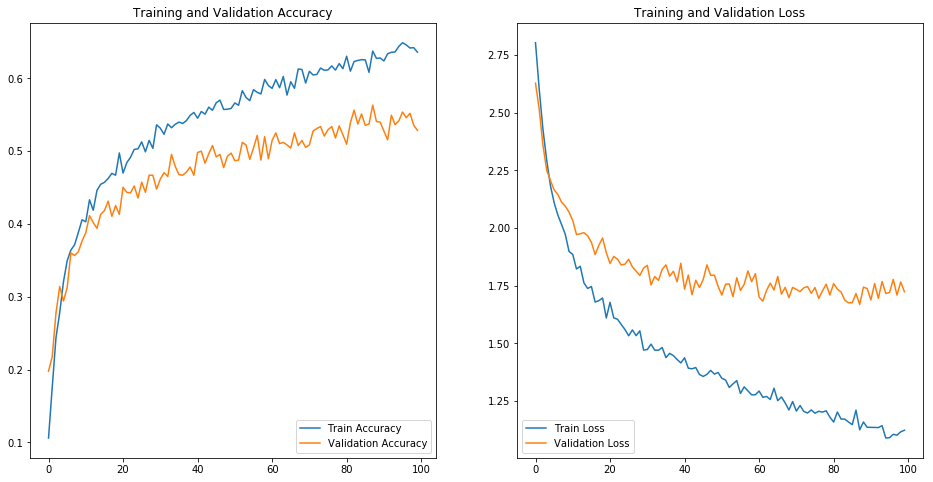

In [28]:
plt_acc_loss()

### 8. Export Model

In [50]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

# serialize weights to HDF5
model.save_weights("model.h5")